In [1]:
import networkx as nx

In [2]:
import json 
fr = open("contacts.json",'rb')
obj = json.load(fr)

In [3]:
import pandas as pd
df = pd.DataFrame(obj)
df.head()

,Id,Email,Phone,Contacts,OrderId
0,0,gkzAbIy@qq.com,,1,
1,1,,329442681752,4,vDDJJcxfLtSfkooPhbYnJdxov
2,2,,9125983679,0,
3,3,mdllpYmE@gmail.com,,0,bHquEnCbbsGLqllwryxPsNOxa
4,4,,300364407,2,


In [4]:
email_dict = df.groupby('Email')['Id'].apply(list).to_dict()
phone_dict = df.groupby('Phone')['Id'].apply(list).to_dict()
orderId_dict = df.groupby('OrderId')['Id'].apply(list).to_dict()

In [5]:
del email_dict['']
del phone_dict['']
del orderId_dict['']

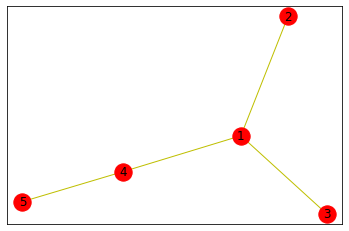

In [6]:
from matplotlib import pyplot as plt  
g=nx.Graph() 
g.add_nodes_from([1,2,3,4,5]) 
g.add_edges_from([(1,2),(1,3),(1,4),(4,5)]) 
nx.draw_networkx(g,node_color="r",edge_color="y") 
plt.show()

In [7]:
G = nx.Graph()
G.add_nodes_from(df.Id.tolist())
#G.nodes()

In [8]:
def genEdges(ll):
    r = []
    for i in range(len(ll)):
#         print(i,len(ll))
        for j in range(i+1,len(ll)):
            if i == j : break
#             print(ll[i],'->',ll[j],end=', ')
            r.append([ll[i],ll[j]])
#         print()
    return r
genEdges([1,2,3,4,5])

[[1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [2, 3],
 [2, 4],
 [2, 5],
 [3, 4],
 [3, 5],
 [4, 5]]

In [9]:
email_edges = []
for e in email_dict:
    email_edges.extend(genEdges(email_dict[e]))
G.add_edges_from(email_edges)

In [10]:
phone_edges = []
for e in phone_dict:
    phone_edges.extend(genEdges(phone_dict[e]))
    
G.add_edges_from(phone_edges)

In [11]:
order_edges = []
for e in orderId_dict:
    order_edges.extend(genEdges(orderId_dict[e]))
    
G.add_edges_from(order_edges)

In [12]:
components = list(nx.connected_components(G))
components[:10]

[{0},
 {1, 2458, 98519, 115061, 140081, 165605, 476346},
 {2, 159312, 322639, 348955},
 {3},
 {4},
 {5, 50, 212533, 215197, 226720, 383605, 404324, 458692, 482810},
 {6, 38, 32871, 142067, 236367},
 {7},
 {8, 183160, 406623},
 {9, 13, 16708, 33415, 343161, 417916, 468927, 484896}]

In [13]:
temp_df = df.iloc[list(components[2]),:]
temp_df

,Id,Email,Phone,Contacts,OrderId
159312,159312,EQnHOWbVizLZxRnm@gmail.com,5994952372,1,FTUBZYkUAEPIYmYvxtxKYYlqt
2,2,,9125983679,0,
348955,348955,EQnHOWbVizLZxRnm@gmail.com,9125983679,0,
322639,322639,EQnHOWbVizLZxRnm@gmail.com,,3,zDhCFyaTJEqyxtEqiHxdTPmPt


In [14]:
def com2str(temp_df):
    Id_list = temp_df.Id.tolist()
    Id_list.sort()
#     Id_list
    total_conacts=temp_df.Contacts.sum()
#     total_conacts
    column2_str = "-".join([str(x) for x in Id_list])+", "+str(total_conacts)
    return column2_str

In [15]:
com2str(temp_df)

'2-159312-322639-348955, 4'

In [16]:
df['ticket_trace/contact']=['']*5000*100
assert (df['ticket_trace/contact']=='').sum() ==5000*100

In [17]:
for i in range(len(components)):
    id_list = list(components[i])
    temp_df = df.iloc[id_list,:]
    column2_str = com2str(temp_df)
    
    for ii in id_list:
        df.at[ii,'ticket_trace/contact']= column2_str

In [18]:
assert (df['ticket_trace/contact']=='').sum() ==0

In [19]:
output_df = df[['Id','ticket_trace/contact']]
output_df.columns = ['ticket_id','ticket_trace/contact']
output_df.head()

,ticket_id,ticket_trace/contact
0,0,"0, 1"
1,1,"1-2458-98519-115061-140081-165605-476346, 12"
2,2,"2-159312-322639-348955, 4"
3,3,"3, 0"
4,4,"4, 2"
